## Data visualization and machine learning for 2015 world's happiness data.
In this kernel our target's to make data analytics and visualization to world's happiness 2015 report for more understanding of
our data as well as relationships.
Then we predict the happiness score using machine learning algorthims*.
- We're going to import our libraries*.
- Read the data from csv files which brought from Kaggle.com*.
- Data visualization using different plots, heatmap and choropleth*.
- Build our machine learning by linear regression model*.
- Evaluation of our model and predictions*.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

## Reading our csv file and set it into a dataframe called wh

In [3]:
wh=pd.read_csv('2015.csv')

In [4]:
wh.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

## Different plots, heatmap and choropleth

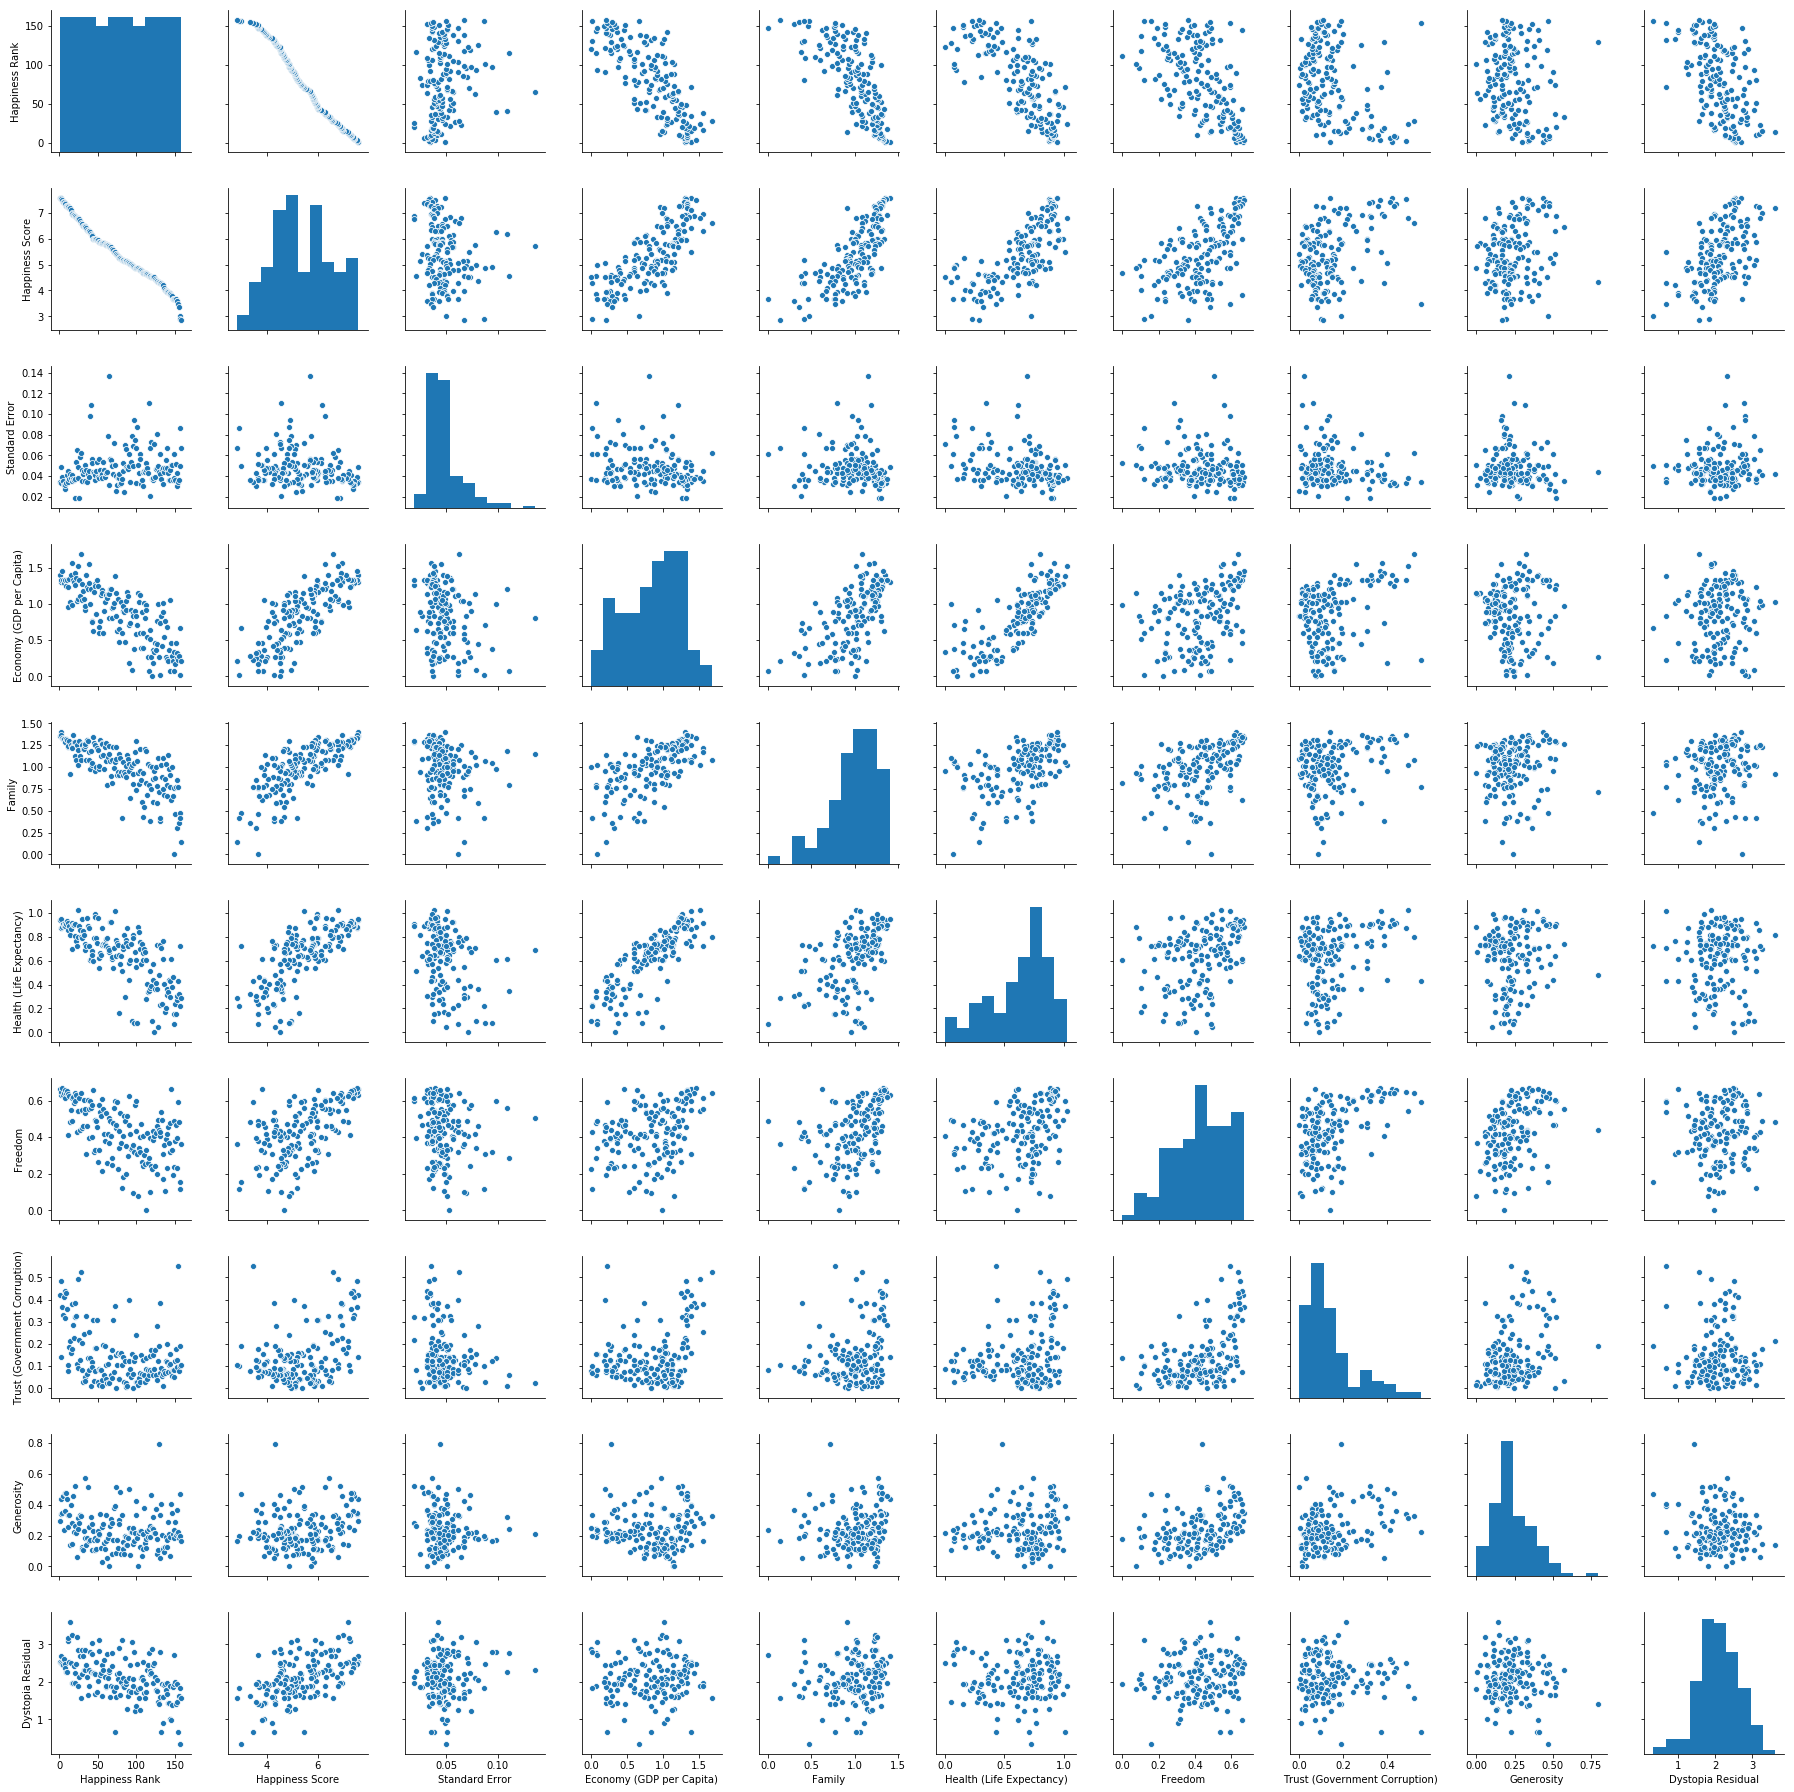

In [5]:
sns.pairplot(data=wh)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

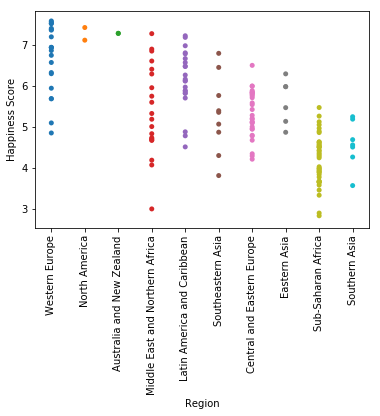

In [6]:
sns.stripplot(x='Region',y='Happiness Score',data=wh,jitter=False)
plt.xticks(rotation=90)
#we use scatter plot to show where the highest happiness scores are. 

C:\Users\Public\anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

C:\Users\Public\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



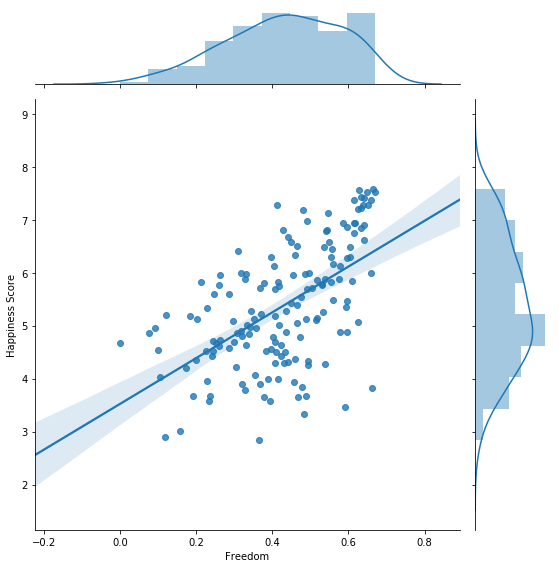

In [7]:
sns.jointplot(x='Freedom',y='Happiness Score',data=wh,kind='reg',size=8)
#By jointplot we can see clearly happiness score increases with freedom increase.

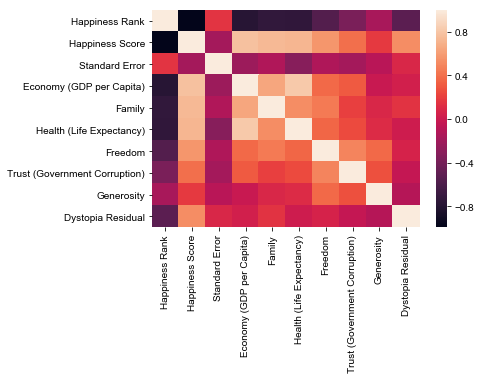

In [8]:
sns.heatmap(wh.corr())
sns.set(rc={'figure.figsize':(15,10)})


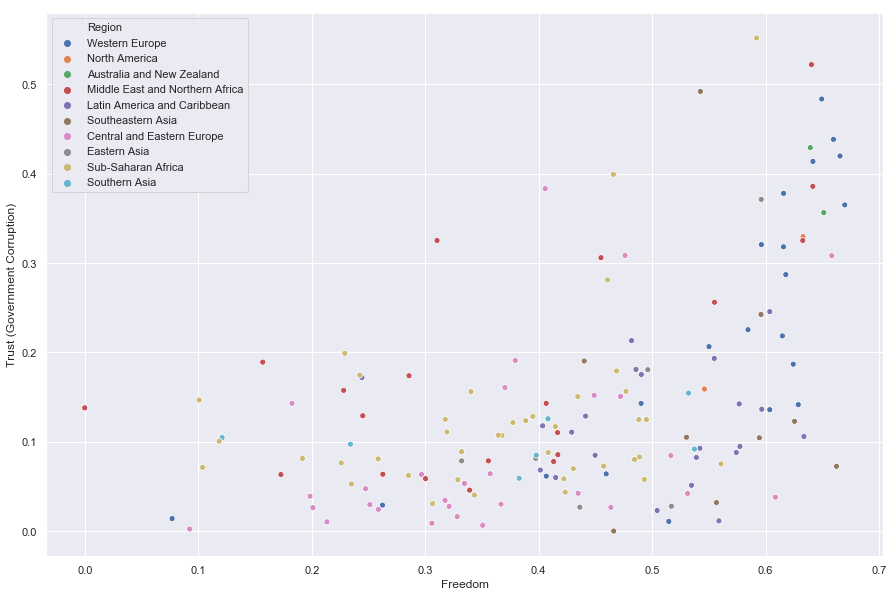

In [9]:
sns.scatterplot(x='Freedom',y='Trust (Government Corruption)',data=wh, hue='Region')
sns.set({'figure.figsize':(15,10)})
#by scatter plot the more freedom the more trust in governments.

C:\Users\Public\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



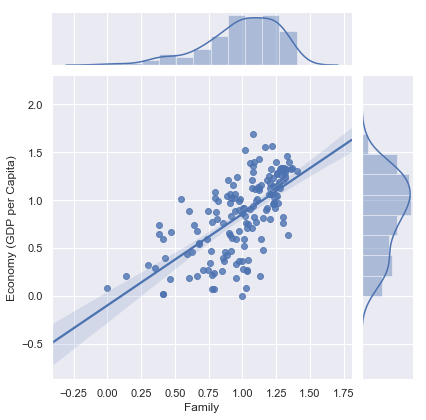

In [10]:
g=sns.JointGrid(x='Family',y='Economy (GDP per Capita)',data=wh)
g=g.plot(sns.regplot,sns.distplot)
#Relation between family members and the economy.

In [11]:
#using interactive choropleth to show the happiness distribtion on the Earth map.
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [12]:
data = dict(type='choropleth',
            locations = wh['Country'],
           locationmode = 'country names',
            z = wh['Happiness Rank'],
            text = wh['Country'],
            colorbar = {'title':"Happiness Score"}
            ) 

In [13]:
layout = dict(
    title = '2015 World Happiness',
    geo = dict( showframe = False)
    )

In [14]:
choromap = go.Figure([data],layout)
iplot(choromap)

## Building our linear regression model

In [15]:
wh.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

In [16]:
wh.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [17]:
#determine our goal which is predicting happiness score
X=wh[[ 'Happiness Rank','Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']] 
Y=wh['Happiness Score']

In [18]:
#splitting our data into trainning and testing sets
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression 
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print(lm.intercept_)

-0.0002207848827922021


In [22]:
#show the coefficient for all factors.
coeff_wh = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_wh


Coefficient
Happiness Rank                    0.000002
Standard Error                    0.000440
Economy (GDP per Capita)          1.000173
Family                            0.999889
Health (Life Expectancy)          1.000113
Freedom                           0.999843
Trust (Government Corruption)     0.999971
Generosity                        0.999837
Dystopia Residual                 1.000026

- Holding all other features fixed, an increase in economy is associated with an *increase of 1.000173 *.
- Holding all other features fixed, an increase in family is associated with an *increase of 0.999889 *.
- Holding all other features fixed, an increase in life expectancy is associated with an *increase of 1.000113 *.
- Holding all other features fixed, an increase in trust is associated with an *increase of 0.999971 *.
- Holding all other features fixed, an increase in generosity is associated with an *increase of 0.9998 *.
- Holding all other features fixed, an increase in dystopia residual is associated with an *increase of 1.000026 *.

In [23]:
predictions = lm.predict(X_test)

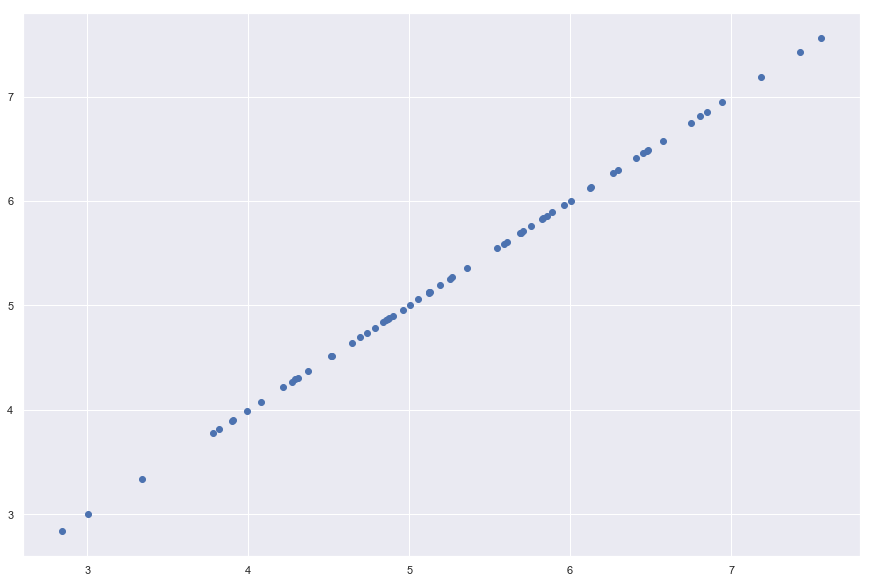

In [24]:
plt.scatter(Y_test,predictions)
#As we can see our predictions's going well.

C:\Users\Public\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



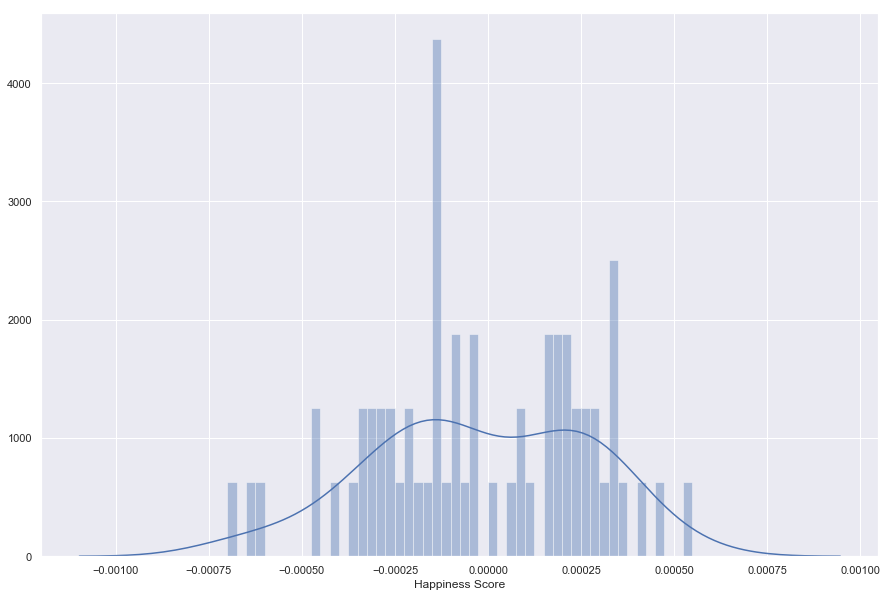

In [25]:
#our residual histogram
sns.distplot((Y_test-predictions),bins=50);

## Regression Evaluation Metrics


In [26]:
from sklearn import metrics

In [27]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 0.00024413004769455182
MSE: 8.184784160127183e-08
RMSE: 0.0002860906178141322
